In [1]:
%matplotlib inline
import torch
import numpy as np
import torch.optim as optim

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [2]:
def model(t_u, params):
    w_1, w_2, b = params
    return w_1 * t_u ** 2 + w_2 * t_u + b

In [3]:
def loss_fn(t_p, t_c):
    sq_loss = (t_p - t_c) ** 2
    return sq_loss.mean()

In [26]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        with torch.no_grad():
            val_t_p = model(val_t_u, params)
            val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch < 5 or epoch % 500 == 0:
            print('Epoch %d, Training loss: %f, Validation loss: %f' 
                  % (epoch, train_loss, val_loss))
            print('\tparams {}'.format(params))
    return params

In [27]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 9,  4,  5,  7,  8,  0,  2, 10,  1]), tensor([3, 6]))

In [28]:
train_t_un = t_un[train_indices]
train_t_c = t_c[train_indices]

val_t_un = t_un[val_indices]
val_t_c = t_c[val_indices]

In [29]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 3e-4
optimizer = optim.SGD([params], lr=learning_rate)

In [30]:
params = training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)
params

Epoch 1, Training loss: 562.052002, Validation loss: 1187.634888
	params tensor([ 0.5826,  0.9259, -0.0137], requires_grad=True)
Epoch 2, Training loss: 126.375381, Validation loss: 197.188400
	params tensor([ 0.3936,  0.8914, -0.0204], requires_grad=True)
Epoch 3, Training loss: 36.827595, Validation loss: 26.380264
	params tensor([ 0.3081,  0.8749, -0.0239], requires_grad=True)
Epoch 4, Training loss: 18.414480, Validation loss: 6.082649
	params tensor([ 0.2695,  0.8665, -0.0259], requires_grad=True)
Epoch 500, Training loss: 8.935589, Validation loss: 3.215399
	params tensor([ 0.3764,  0.1223, -0.3915], requires_grad=True)
Epoch 1000, Training loss: 6.092668, Validation loss: 0.074327
	params tensor([ 0.4847, -0.4517, -0.6788], requires_grad=True)
Epoch 1500, Training loss: 4.397204, Validation loss: 1.864912
	params tensor([ 0.5682, -0.8934, -0.9039], requires_grad=True)
Epoch 2000, Training loss: 3.385797, Validation loss: 5.753123
	params tensor([ 0.6325, -1.2329, -1.0810], requi

tensor([ 0.7200, -1.6933, -1.3323], requires_grad=True)

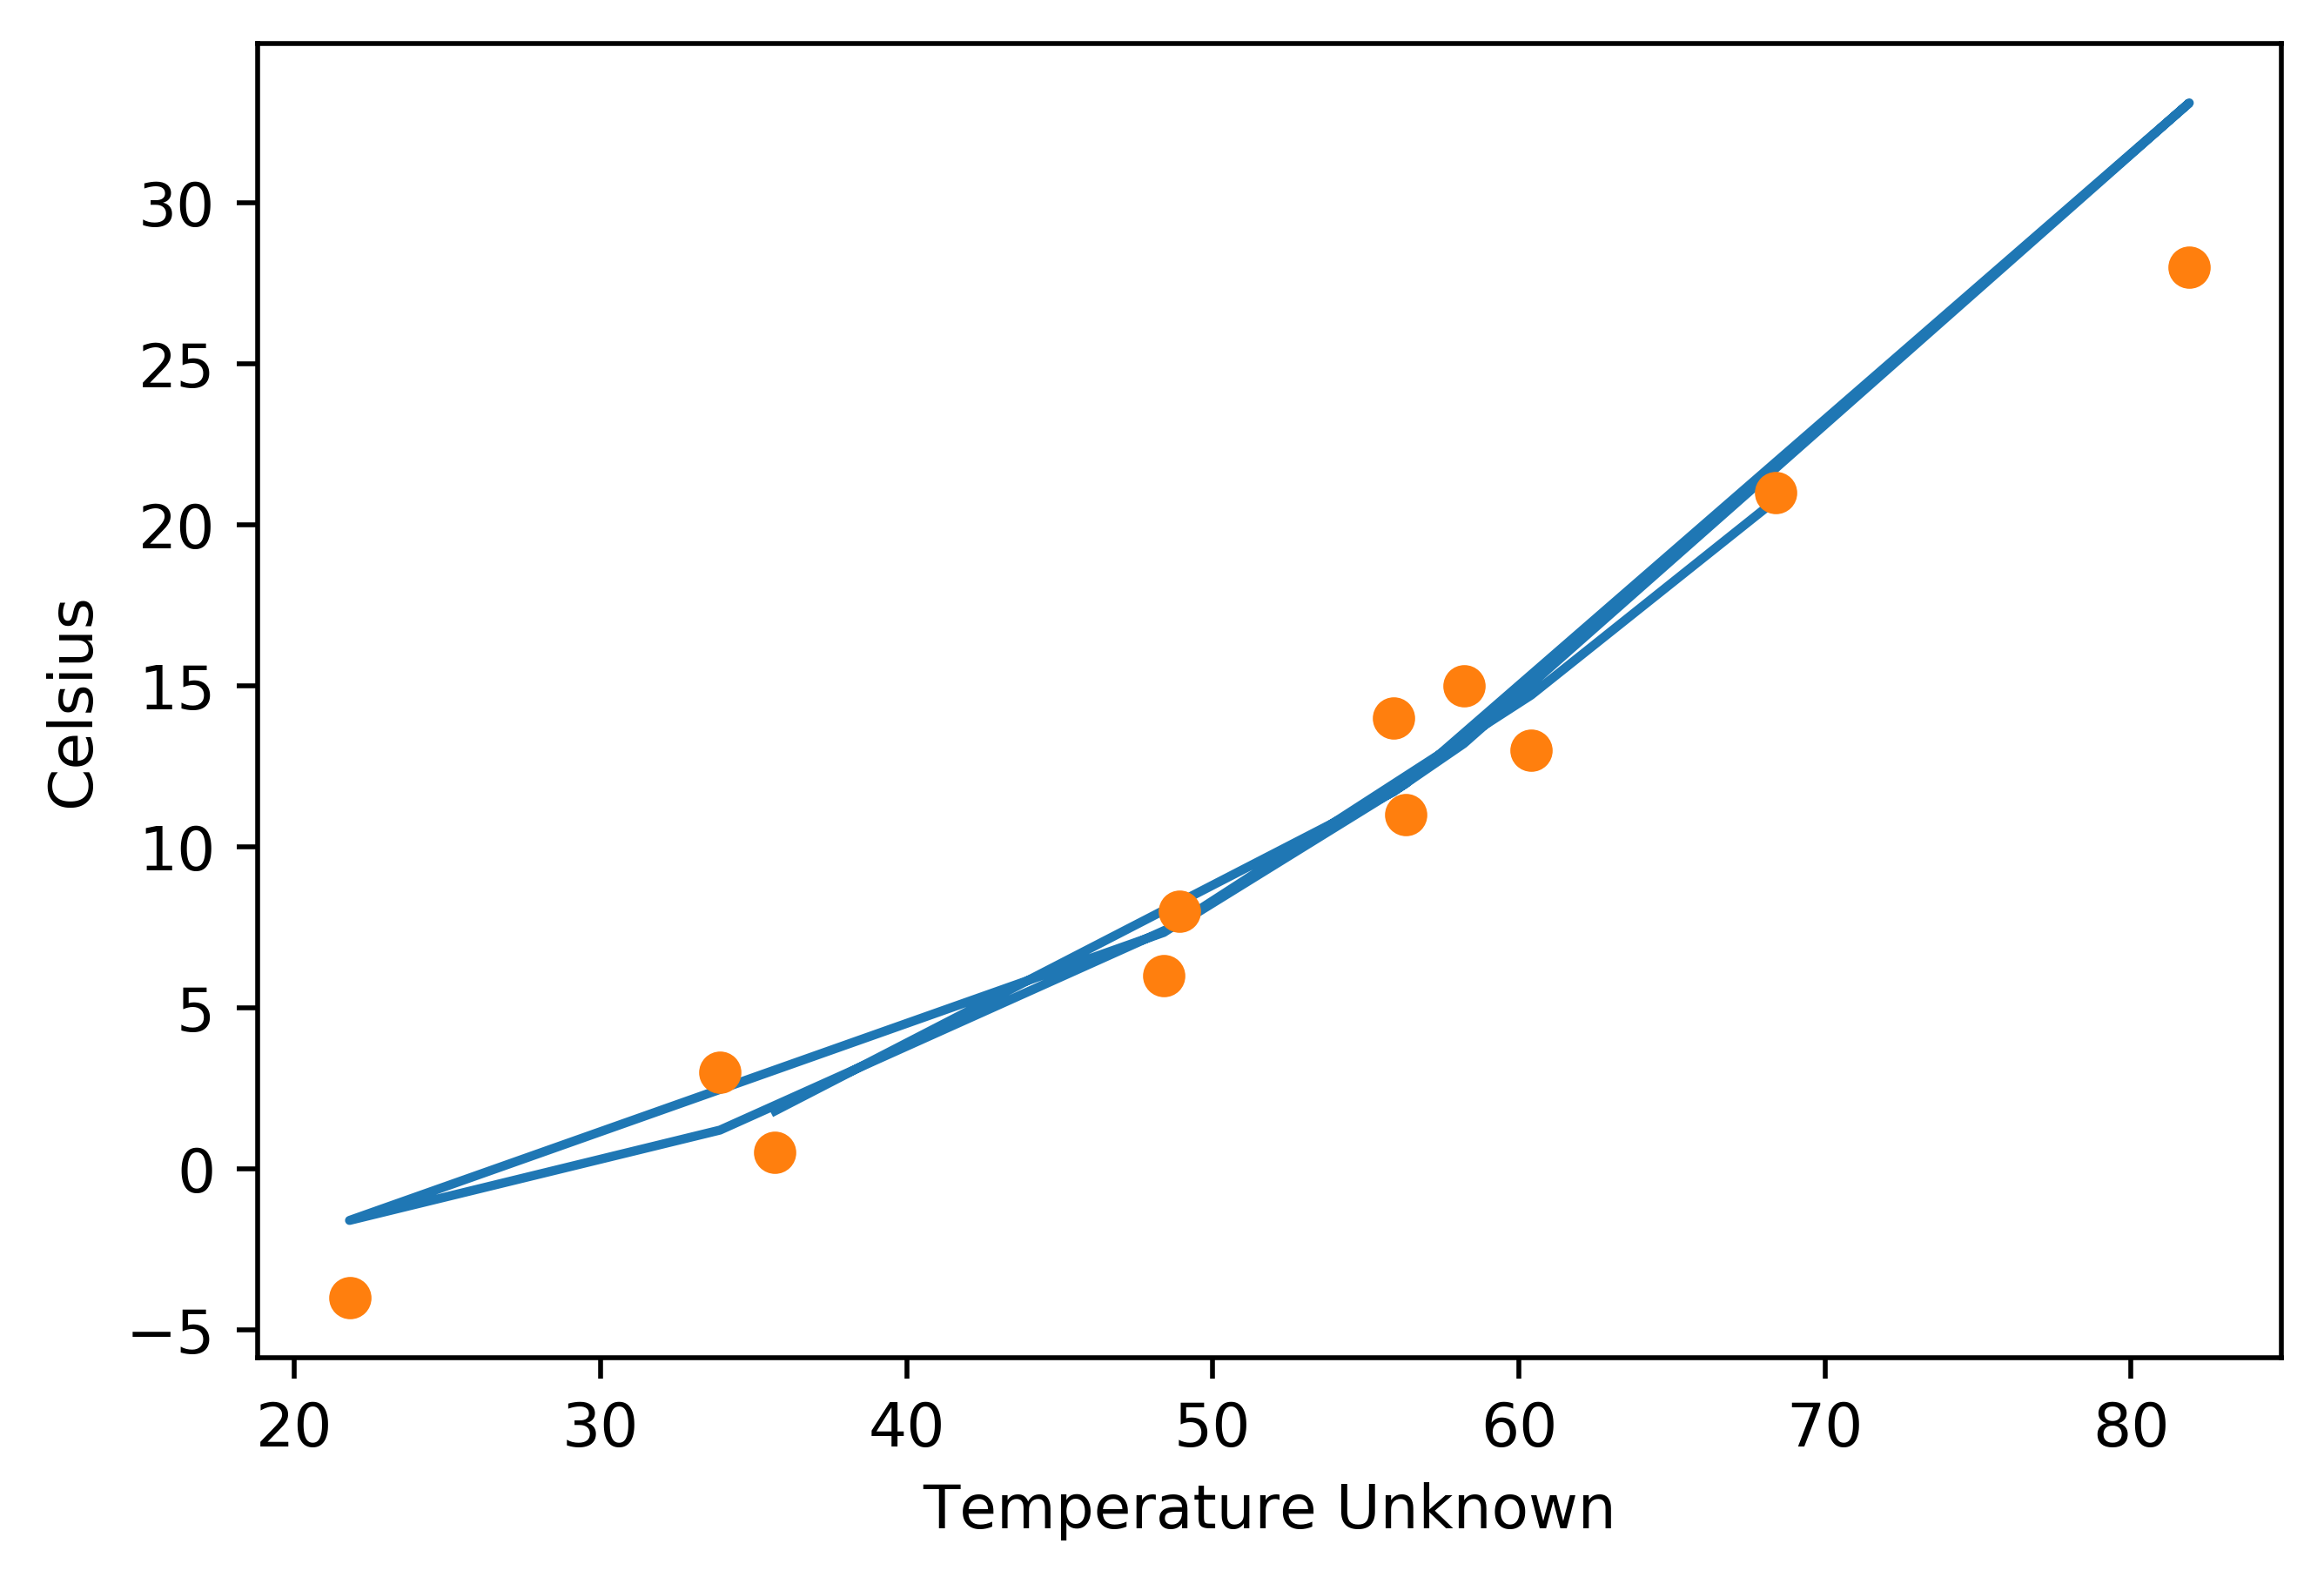

In [31]:
import matplotlib.pyplot as plt

t_p = model(t_un, params)

fig = plt.figure(dpi=500)
plt.xlabel("Temperature Unknown")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')